In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("deep", 20)
#colors = sns.choose_colorbrewer_palette('qualitative') #{‘sequential’, ‘diverging’, ‘qualitative’}
sns.set(context="poster")
sns.set_style("dark")

In [3]:
basedir = "D:/analysis/Creinhardtii/"

In [4]:
file_blat = basedir + 'SRR2132449.out.cds.noheader.psl'

In [5]:
df = pd.read_csv(file_blat,sep='\t',header=None)

In [6]:
mask = (df[1] <= 2) # mismatch 2개 이하
df_mask = df[mask]

In [7]:
dicGN2pos = {}
for i in df_mask.index:
    gn = df_mask.loc[i][13]
    m_left = int(df_mask.loc[i][15])
    m_right = int(df_mask.loc[i][16])
    try:
        dicGN2pos[gn] += range(m_left,m_right)
    except KeyError:
        dicGN2pos[gn] = [df_mask.loc[i][14]]
        dicGN2pos[gn] += range(m_left,m_right)

In [11]:
dicGN2cov = {}
for gn in dicGN2pos.keys():
    mapped_pos = float(len(set(dicGN2pos[gn][1:])))
    gene_length = float(dicGN2pos[gn][0])
    cov = mapped_pos/gene_length
    dicGN2cov[gn] = gene_length, cov

In [39]:

gn_list = dicGN2cov.keys()
gn_list.sort(key=lambda x:dicGN2cov[x][0],reverse=True)
gn = gn_list[0]
print gn,dicGN2cov[gn],dicGN2pos[gn][0]

Cre10.g449750.t1.1 (71580.0, 0.7581587035484773) 71580


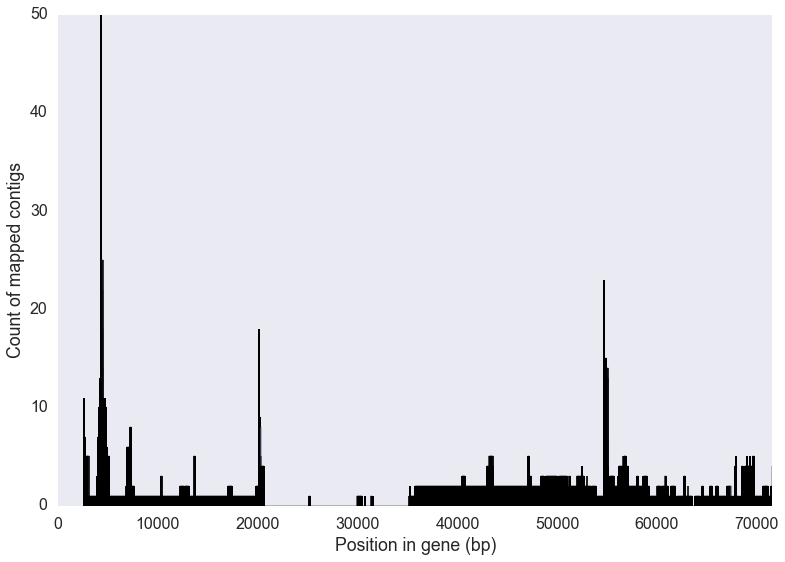

In [41]:
#print dicGN2cov[gn],dicGN2pos[gn]
fig, ax = plt.subplots(1)
pos = dicGN2pos[gn][1:]
a,b,c = ax.hist(pos,bins=np.arange(min(pos),max(pos),1))
#ax1.plot(b[0:len(a)],a)
#ax1.set_ylim(0)
#ax.plot(a,b)
ax.set_xlim(0,dicGN2pos[gn][0])
#ax1.set_xlim(min(pos),max(pos))
ax.set_xlabel('Position in gene (bp)')
ax.set_ylabel('Count of mapped contigs')

In [43]:
gn = gn_list[1]
print gn,dicGN2cov[gn],dicGN2pos[gn][0]

Cre14.g612633.t1.1 (32097.0, 0.9890332429822102) 32097


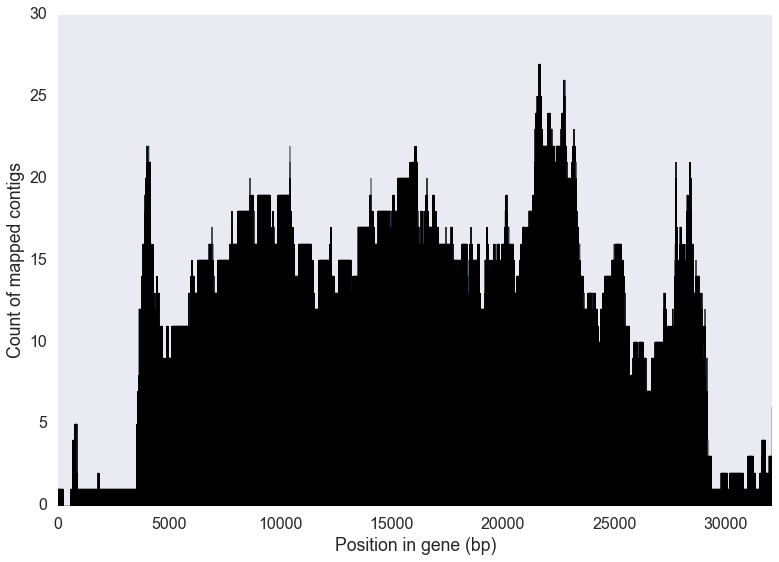

In [42]:
gn = gn_list[1]
#print dicGN2cov[gn],dicGN2pos[gn]
fig, ax = plt.subplots(1)
pos = dicGN2pos[gn][1:]
a,b,c = ax.hist(pos,bins=np.arange(min(pos),max(pos),1))
#ax1.plot(b[0:len(a)],a)
#ax1.set_ylim(0)
#ax.plot(a,b)
ax.set_xlim(0,dicGN2pos[gn][0])
#ax1.set_xlim(min(pos),max(pos))
ax.set_xlabel('Position in gene (bp)')
ax.set_ylabel('Count of mapped contigs')